# Supervised Machine Learning 
Exercises to find the best hyperparameter configuration for an SVM (Support Vector Machine) using the four pre-implemented kernels (linear, polynomial, radial basis function (RBF), and sigmoid)


### **Referencias:**

1. https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html

- SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma.
- The parameter C, common to all SVM kernels.
- Kernels: linear, polynomial, rbf, sigmoid

### **Libraries**

In [5]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.model_selection import ShuffleSplit
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from itertools import product
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
#%matplotlib notebook
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import matplotlib.colors as mcolors
from sklearn.metrics.pairwise import rbf_kernel
from scipy.spatial import distance_matrix 
import warnings
warnings.filterwarnings("ignore")

### **Databases**

In [6]:
def get_bd(i):
    if i == "iris" :
        (X,y) = load_iris(return_X_y=True, as_frame=True)
    if i == "breast_cancer" : 
        (X,y) = load_breast_cancer(return_X_y=True, as_frame=True)
    if i == "digits" : 
        (X,y) = load_digits(return_X_y=True, as_frame=True)
    if i == "wine" : 
        (X,y) = load_wine(return_X_y=True, as_frame=True)
    return (X,y)

## **Exercise 1**

Write a functionoptimize_svm(X, y)that tries to find the bestconfiguration for an SVM (SVC) using all the four pre-implemented kernels.  Some of thekernels have additional hyperparameters in scikit-learn (we consider C, degree, and sigma).To this end, do the following:

**1.** We want to choose C and sigma on a log-scale, i.e., as values10ifor values ofi∈{−5,−4, ..,5}Degree should be chosen as an integer between2and5.  Create threetuplesvi= (namei, valsi)wherenameiis a string of the hyperparameter as expected byscikit-learn, andvalsiis a list of the possible values considered for this hyperparameter(as described above).

**2.** Next create a dictionary, where you specify, for each kernel, a list containing all thevirelevant for that kernel.

In [3]:
[np.logspace(-5,5,11)]

[array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
        1.e+03, 1.e+04, 1.e+05])]

In [4]:
varname = {'gamma': [1e-5,1e-4,1e-3,1e-2,1e-1,1e+0,1e+1,1e+2,1e+3,1e+4,1e+5],
          'C': [1e-5,1e-4,1e-3,1e-2,1e-1,1e+0,1e+1,1e+2,1e+3,1e+4,1e+5],
          'degree': [2,3,4,5]}
kernel = {"kernel": ["linear","sigmoid","rbf", "poly"]}

**3.** Now iterate over all the kernels, and do the following:
- a) Within the loop, run in an inner loop over all the possible hyperparameter config-urations for this kernel (hint: checkitertools.productfor this and the usage offunction(*varname)in python).
- b) For a concrete combination of values for the hyperparameters, prepare a dictionarywith the names and values (here you need to use thenameifrom the descriptionsabove). Then run a cross-validation for an SVC with these hyperparameters (hint:check the usage of thefunction(**dictionary)in python).
- c) check whether the validation score (accuracy) is the best seen so far, and if so,memorize the used kernel and other hyperparameters.This can generally take a while, because in this setup, you will look at 616 possiblehyperparameter configurations.

In [5]:
# Kernel Linear
def score_linear (X,y):
    z=varname['C']
    score=0
    for i in z:
        clf = svm.SVC(kernel="linear", C=i)
        clf.fit(X, y)
        score1= np.mean (cross_val_score(clf, X, y, cv=5, scoring="accuracy"))
        # print(i,score)
        if score1 > score: 
            score=score1
            C = i
    return (score, C ,"linear")

# Kernel rbf
def score_rbf (X,y):
    lista =list (product(varname['C'], varname['gamma']))
    score=0
    for (a,b) in lista:
        clf = svm.SVC(kernel="rbf", C=a, gamma=b )
        clf.fit(X, y)
        score2= np.mean (cross_val_score(clf, X, y, cv=5, scoring="accuracy"))
        # print(a,b)
        if score2 > score: 
            score=score2
            C = a
            gamma = b
    return (score,C,gamma, "rbf")


# Kernel sigmoid
def score_sigmoid (X,y):
    lista =list (product(varname['C'], varname['gamma']))
    score=0
    for (a,b) in lista:
        clf = svm.SVC(kernel="sigmoid", C=a, gamma=b )
        clf.fit(X, y)
        score3= np.mean (cross_val_score(clf, X, y, cv=5, scoring="accuracy"))
        # print(a,b)
        if score3 > score: 
            score=score3
            C = a
            gamma = b
    return (score,C,gamma, "sigmoid")

    
# Kernel "Poly"
def score_poly (X,y):
    lista =list (product(varname['C'], varname['gamma'], varname['degree']))
    score=0
    for (a,b,c) in lista:
        clf = svm.SVC(kernel="poly", C=a, gamma=b, degree=c )
        clf.fit(X, y)
        score4= np.mean (cross_val_score(clf, X, y, cv=5, scoring="accuracy"))
        print(a,b,c,score4)
        if score4 > score: 
            score=score4
            C = a
            gamma = b
            degree = c
    return(score,C,gamma,degree,"poly")

# Kernel "Poly"
def score_poly (X,y):
    lista =list (product(varname['C'], varname['gamma'], varname['degree']))
    score=0
    for (a,b,c) in lista:
        clf = svm.SVC(kernel="poly", C=a, gamma=b, degree=c )
        clf.fit(X, y)
        score4= np.mean (cross_val_score(clf, X, y, cv=5, scoring="accuracy"))
        print(a,b,c,score4)
        if score4 > score: 
            score=score4
            C = a
            gamma = b
            degree = c
    return(score,C,gamma,degree,"poly")


**4.** Which is the best hyperparameter configuration for iris, breast-cancer, digits, and wine,respectively?

Report the accuracy of those configurations compared to what you get using the defaulthyperparameters of scikit-learn.

In [6]:
def optimize_svm(X, y):
    score = 0
    (score1,C1, kernel1) = score_linear (X,y)
    print(score1,C1, kernel1)
    if score1 > score:
        score=score1
        kernel= kernel1
        C=C1
        gamma=0
        degree=0
    (score2,C2,gamma1, kernel2) = score_rbf (X,y)
    print(score2,C2,gamma1, kernel2)
    if score2 > score:
        score=score2
        kernel= kernel2
        C=C2
        gamma=gamma1
        degree=0
    (score3,C3,gamma2, kernel3) = score_sigmoid (X,y)
    print(score3,C3,gamma2, kernel3)
    if score3 > score:
        score=score3
        kernel= kernel3
        C=C3
        gamma=gamma2
        degree=0
    (score4,C4,gamma3,degree1, kernel4) = score_poly (X,y)
    print(score4,C4,gamma3,degree1, kernel4)
    if score4 > score:
        score=score4
        kernel= kernel4
        C=C4
        gamma=gamma3
        degree=degree1
    return (score,kernel,C,gamma,degree)


### **IRIS**

In [20]:
X,y = get_bd('iris')
(score,kernel,C,gamma,degree)= optimize_svm(X, y)
print(f"Best score {kernel} : score = {score} , C ={C} , gamma = {gamma} , degree ={degree}")

0.9800000000000001 1.0 linear
0.9800000000000001 1.0 0.1 rbf
0.9866666666666667 1000.0 0.001 sigmoid
0.9800000000000001 0.0001 1.0 3 poly
Best score sigmoid : score = 0.9866666666666667 , C =1000.0 , gamma = 0.001 , degree =0


### Default values:

- Linear

In [21]:
X,y = get_bd('iris')
cv = ShuffleSplit(n_splits=10, train_size=0.8, random_state=4)
clf = svm.SVC(kernel="linear" )
clf.fit(X, y)
score1= np.mean (cross_val_score(clf, X, y, cv=cv, scoring="accuracy"))
score1

0.9733333333333334

- RBF

In [22]:
X,y = get_bd('iris')
cv = ShuffleSplit(n_splits=10, train_size=0.8, random_state=4)
clf = svm.SVC(kernel="rbf")
clf.fit(X, y)
score1= np.mean (cross_val_score(clf, X, y, cv=cv, scoring="accuracy"))
score1

0.96

- Sigmoid

In [23]:
X,y = get_bd('iris')
cv = ShuffleSplit(n_splits=10, train_size=0.8, random_state=4)
clf = svm.SVC(kernel="sigmoid")
clf.fit(X, y)
score1= np.mean (cross_val_score(clf, X, y, cv=cv, scoring="accuracy"))
score1

0.2033333333333333

- Poly

In [24]:
X,y = get_bd('iris')
cv = ShuffleSplit(n_splits=10, train_size=0.8, random_state=4)
clf = svm.SVC(kernel="poly")
clf.fit(X, y)
score1= np.mean (cross_val_score(clf, X, y, cv=cv, scoring="accuracy"))
score1

0.9633333333333333

### **WINE**

In [ ]:
X,y = get_bd('wine')
(score,kernel,C,gamma,degree)= optimize_svm(X, y)
print(f"Best score {kernel} : score = {score} , C ={C} , gamma = {gamma} , degree ={degree}")

0.961111111111111 0.1 linear
0.9387301587301587 100000.0 1e-05 rbf
0.3990476190476191 1e-05 1e-05 sigmoid
0.9777777777777779 0.001 0.01 2 poly
Best score poly : score = 0.9777777777777779 , C =0.001 , gamma = 0.01 , degree =2


### Default values:

- Linear

In [ ]:
X,y = get_bd('wine')
cv = ShuffleSplit(n_splits=10, train_size=0.8, random_state=4)
clf = svm.SVC(kernel="linear")
clf.fit(X, y)
score1= np.mean (cross_val_score(clf, X, y, cv=cv, scoring="accuracy"))
score1

0.9583333333333333

- RBF

In [ ]:
X,y = get_bd('wine')
cv = ShuffleSplit(n_splits=10, train_size=0.8, random_state=4)
clf = svm.SVC(kernel="rbf")
clf.fit(X, y)
score1= np.mean (cross_val_score(clf, X, y, cv=cv, scoring="accuracy"))
score1

0.6583333333333333

- Sigmoid

In [ ]:
X,y = get_bd('wine')
cv = ShuffleSplit(n_splits=10, train_size=0.8, random_state=4)
clf = svm.SVC(kernel="sigmoid")
clf.fit(X, y)
score1= np.mean (cross_val_score(clf, X, y, cv=cv, scoring="accuracy"))
score1

0.175

- Poly

In [ ]:
X,y = get_bd('wine')
cv = ShuffleSplit(n_splits=10, train_size=0.8, random_state=4)
clf = svm.SVC(kernel="poly")
clf.fit(X, y)
score1= np.mean (cross_val_score(clf, X, y, cv=cv, scoring="accuracy"))
score1

0.6583333333333332

### **DIGITS**

In [14]:
X,y = get_bd('digits')
(score,kernel,C,gamma,degree)= optimize_svm(X, y)
print(f"Best score {kernel} : score = {score} , C ={C} , gamma = {gamma} , degree ={degree}")

0.951047663262148 0.001 linear
0.9721866295264624 1.0 0.001 rbf
0.951047663262148 100.0 1e-05 sigmoid
1e-05 1e-05 2 0.1558774373259053
1e-05 1e-05 3 0.15643454038997215
1e-05 1e-05 4 0.15309192200557104
1e-05 1e-05 5 0.14974930362116995
1e-05 0.0001 2 0.1558774373259053
1e-05 0.0001 3 0.15643454038997215
1e-05 0.0001 4 0.15309192200557104
1e-05 0.0001 5 0.14974930362116995
1e-05 0.001 2 0.1558774373259053
1e-05 0.001 3 0.15643454038997215
1e-05 0.001 4 0.15309192200557104
1e-05 0.001 5 0.3778613432373878
1e-05 0.01 2 0.5659873104302073
1e-05 0.01 3 0.9521618693902816
1e-05 0.01 4 0.9655044877746828
1e-05 0.01 5 0.9571665119158155
1e-05 0.1 2 0.9588347260909936
1e-05 0.1 3 0.96884246363355
1e-05 0.1 4 0.9655044877746828
1e-05 0.1 5 0.9571665119158155
1e-05 1.0 2 0.9643902816465489
1e-05 1.0 3 0.96884246363355
1e-05 1.0 4 0.9655044877746828
1e-05 1.0 5 0.9571665119158155
1e-05 10.0 2 0.9643902816465489
1e-05 10.0 3 0.96884246363355
1e-05 10.0 4 0.9655044877746828
1e-05 10.0 5 0.957166511

### Default values:

- Linear

In [7]:
X,y = get_bd('digits')
cv = ShuffleSplit(n_splits=10, train_size=0.8, random_state=4)
clf = svm.SVC(kernel="linear")
clf.fit(X, y)
score1= np.mean (cross_val_score(clf, X, y, cv=cv, scoring="accuracy"))
score1

0.9791666666666666

- RBF

In [8]:
X,y = get_bd('digits')
cv = ShuffleSplit(n_splits=10, train_size=0.8, random_state=4)
clf = svm.SVC(kernel="rbf")
clf.fit(X, y)
score1= np.mean (cross_val_score(clf, X, y, cv=cv, scoring="accuracy"))
score1

0.9880555555555555

- Sigmoid

In [9]:
X,y = get_bd('digits')
cv = ShuffleSplit(n_splits=10, train_size=0.8, random_state=4)
clf = svm.SVC(kernel="sigmoid")
clf.fit(X, y)
score1= np.mean (cross_val_score(clf, X, y, cv=cv, scoring="accuracy"))
score1

0.9072222222222222

- Poly

In [7]:
X,y = get_bd('digits')
cv = ShuffleSplit(n_splits=10, train_size=0.8, random_state=4)
clf = svm.SVC(kernel="poly")
clf.fit(X, y)
score1= np.mean (cross_val_score(clf, X, y, cv=cv, scoring="accuracy"))
score1

0.9883333333333335

### **BREAST CANCER**

In [11]:
X,y = get_bd('breast_cancer')
(score,kernel,C,gamma,degree)= optimize_svm(X, y)
print(f"Best score {kernel} : score = {score} , C ={C} , gamma = {gamma} , degree ={degree}")

0.9631268436578171 100.0 linear
0.9578015836050303 1000.0 1e-05 rbf
0.6274181027790716 1e-05 1e-05 sigmoid
1e-05 1e-05 2 0.7504424778761062
1e-05 1e-05 3 0.8752678155565906
1e-05 1e-05 4 0.9069088650830617
1e-05 1e-05 5 0.9174662319515603
1e-05 0.0001 2 0.8945815867101382
1e-05 0.0001 3 0.9209750038813848
1e-05 0.0001 4 0.9385033379909953
1e-05 0.0001 5 0.9543238627542306
1e-05 0.001 2 0.9174351808725353
1e-05 0.001 3 0.9543083372147182
1e-05 0.001 4 0.9560937742586555


Valores por defecto:

- Linear

In [48]:
X,y = get_bd('breast_cancer')
cv = ShuffleSplit(n_splits=10, train_size=0.8, random_state=4)
clf = svm.SVC(kernel="linear")
clf.fit(X, y)
score1= np.mean (cross_val_score(clf, X, y, cv=cv, scoring="accuracy"))
score1

0.9473684210526316

- ´RBF

In [45]:
X,y = get_bd('breast_cancer')
cv = ShuffleSplit(n_splits=10, train_size=0.8, random_state=4)
clf = svm.SVC(kernel="rbf")
clf.fit(X, y)
score1= np.mean (cross_val_score(clf, X, y, cv=cv, scoring="accuracy"))
score1

0.9140350877192981

- Sigmoid 

In [46]:
X,y = get_bd('breast_cancer')
cv = ShuffleSplit(n_splits=10, train_size=0.8, random_state=4)
clf = svm.SVC(kernel="sigmoid")
clf.fit(X, y)
score1= np.mean (cross_val_score(clf, X, y, cv=cv, scoring="accuracy"))
score1

0.44561403508771935

- Poly

In [47]:
X,y = get_bd('breast_cancer')
cv = ShuffleSplit(n_splits=10, train_size=0.8, random_state=4)
clf = svm.SVC(kernel="poly")
clf.fit(X, y)
score1= np.mean (cross_val_score(clf, X, y, cv=cv, scoring="accuracy"))
score1

0.9114035087719298

### *Conclusions*

Performing the analysis for the different databases, we can observe that the combination of hyperparameters for each case is variable.
For example, 

- for **iris** the best score was given for the *sigmoid* kernel with a score of = 0.986 , with the combination of C =1000.0 , gamma = 0.001.
- For **wine** the best score was given for the *poly* kernel with a score of = 0.977 , with the combination of C =0.001 , gamma = 0.01 , degree =2. 
- For **digits** the exercise could not be completed due to processing time, however, values of:

        - 0.951 with C=0.001 for linear
        - 0.97 with C=1.0 and gamma=0.001 for rbf
        - 0.95 C=100.0 and gamma=1e-05 for sigmoid
        - up to the combinations seen a 0.96 is observed for poly
        - Thus, it can be said that rbf presents a better combination up to the processing that could be given. However, no conclusion can be drawn.
        
- For **breast cancer** the exercise could not be completed due to processing time, however, values of **breast cancer** are obtained:

        - 0.963 100.0 linear
        - 0.957 1000.0 1e-05 rbf
        - 0.627 1e-05 1e-05 sigmoid
        - a better score of 0.95 can be observed for poly
        - Thus, it can be said that linear presents a better combination up to the processing that could be given, however, no conclusion can be drawn.

These scores are compared with the default values:
- **Iris:** linear: 0.973 ; rbf: 0.96 ; sigmoid: 0.203 ; poly: 0.203
- **Wine:** linear: 0.958 ; rbf: 0.658 ; sigmoid: 0.175 ; poly: 0.658
- **digits:** linear: 0.979 ; rbf: 0.988 ; sigmoid: 0.907 ; poly: 0.988
- **breast_cancer:** linear: 0.947 ; rbf: 0.914 ; sigmoid: 0.44 ; poly: 0.911


It is observed that:
- For iris, the best value given was for linear with 973 with the default values.
- For wine, the best value given was for poly with the given combination of C=0.001, gamma= 0.01, degree=2.
- For digits, the best value given was for rbf with 0.988 with the default values.
- For breast cancer, the best value given was for linear at 0.96 with C=100.


**Notas:**

- For some bds the exercise took several hours and had to be interrupted as it did not generate results in the poly kernels. 
- Some combinations were identified that stopped processing in the larger bases, for example:

        - C=1e-05 ; gamma=100.0 ; degree=5
        - C=1e-05 ; gamma=10000.0 ; degree=3
        - C=1e-05 ; gamma=10000.0 ; degree=2 
        - C=1e-05 ; gamma=1000.0 ; degree=5
        - C=1e-05 ; gamma=1000.0 ; degree=5
        - However, it is not possible to identify all the combinations that are difficult to implement.

- There is evidence of an improvement in the Monte Carlo score, however, the processing time of the svm increases and in some cases does not conclude the execution.



## **Exercise 2**

In this exercise, we modify the solution to the functionplot_belief_modelfrom sheet 2.2. Add a new parameterkernel = Noneto the function.

**1.** if kernelis not provided, the function should just behave as before.

**2.** if provided,kernelshould be a function that receives two vectors and computes anumber. In that case, after the PCA projection of the original data, create the kernelmatrix, i.e., the matrix that contains for each pair of data points (in the 2D data) thekernel value. The learner should now be trained on those data instead of the originalPCA data.In the step of computing the matrixZ, don’t use the original data inM1×M2. Instead,for such a point(m1, m2), compute the landmark valueskernel((m1,m2),(xi1, xi2))with all datapointsxiin the PCA data ofX. This way, the2Dpoint(m1, m2)is trans-formed into an-dimensional point, wherenis the number of datapoints inX. Obtain thepredictedprobabilities(of the positive class) from the trained learner for all these (nown-dimensional) points.

**3.** apply your function with logistic regression to every 2-class (1-vs-rest) version of iris (3cases), wine (3 cases), breast-cancer (1 case), and digits (10 cases). Once without kerneland once using a standard RBF kernel (you might want to implement that functionyourself, i.e.,f(x, y) = exp(−‖x−y‖2). Can you observe any difference? Is logisticregression now also able to learn non-linear models in the original data?

In [ ]:
def get_pca(X):
    Columns = len(X)
    if Columns > 2:
        pca = PCA(n_components=2)
        X_r = pca.fit(X).transform(X)
    else:
        X_r = X
    return X_r

def get_bd(i):
    if i == "iris_Setosa":
        (X,y) = load_iris(return_X_y=True, as_frame=True)   
        y = y == 0 # Setosa vs. los demas
    if i == "iris_versicolor" :
        (X,y) = load_iris(return_X_y=True, as_frame=True)
        y = y == 1 # versicolor vs. los demas
    if i == "iris_virginica":
        (X,y) = load_iris(return_X_y=True, as_frame=True)
        y = y == 2  # virginica vs. los demas
    if i == "breast_cancer_malignant": 
        (X,y) = load_breast_cancer(return_X_y=True, as_frame=True)
        y = y == 0 # malignant vs benign
    if i == "breast_cancer_benign": 
        (X,y) = load_breast_cancer(return_X_y=True, as_frame=True)
        y = y == 1 # benign vs malignant
    if i == "wine_class_0" : 
        (X,y) = load_wine(return_X_y=True, as_frame=True)
        y = y == 0
    if i == "wine_class_1" : 
        (X,y) = load_wine(return_X_y=True, as_frame=True)
        y = y == 1
    if i == "wine_class_2" : 
        (X,y) = load_wine(return_X_y=True, as_frame=True)
        y = y == 2
    if i == "digits_0" : 
        (X,y) = load_digits(return_X_y=True, as_frame=True)
        y = y == 0
    if i == "digits_1" : 
        (X,y) = load_digits(return_X_y=True, as_frame=True)
        y = y == 1
    if i == "digits_2" : 
        (X,y) = load_digits(return_X_y=True, as_frame=True)
        y = y == 2
    if i == "digits_3" : 
        (X,y) = load_digits(return_X_y=True, as_frame=True)
        y = y == 3
    if i == "digits_4" : 
        (X,y) = load_digits(return_X_y=True, as_frame=True)
        y = y == 4
    if i == "digits_5" : 
        (X,y) = load_digits(return_X_y=True, as_frame=True)
        y = y == 5
    if i == "digits_6" : 
        (X,y) = load_digits(return_X_y=True, as_frame=True)
        y = y == 6
    if i == "digits_7" : 
        (X,y) = load_digits(return_X_y=True, as_frame=True)
        y = y == 7
    if i == "digits_8" : 
        (X,y) = load_digits(return_X_y=True, as_frame=True)
        y = y == 8
    if i == "digits_9" : 
        (X,y) = load_digits(return_X_y=True, as_frame=True)
        y = y == 9
    return (X,y)

In [ ]:
X,y = get_bd("digits_10")
class_p = np.unique(y)
class_p

array([False])

In [ ]:
def plot_belief_model_V1(l, X, y, xlabel="X1", ylabel="X2", n = 20,  kernel = None):
    X_train = X[[xlabel,ylabel]]
    l.fit(X_train,y)
    X_label = X_train[xlabel]
    y_label = X_train[ylabel]
    f = plt.figure(figsize = (5,10) ) 
    ax = f.add_subplot(projection='3d')
    ax.scatter(X_label, y_label, 0.5, c = y, s=20, edgecolor='k')
    lower = np.min(X_label)
    upper = np.max(X_label)
    lower1 = np.min(y_label)
    upper1 = np.max(y_label)
    M1 = np.linspace(lower,upper,n)
    M2= np.linspace(lower1,upper1,n)
    m = []
    for i in M1:
        for j in M2:
            m.append([i,j])
    M = pd.DataFrame(m)
    #M1_pd = pd.DataFrame(M1)
    #M2_pd = pd.DataFrame(M2)
    #M = pd.concat([M1_pd, M2_pd], axis=1,)
    #print(M.shape)
    Z = np.zeros((n,n),dtype=np.float64)
    labels = list(np.unique(y))
    t= 0
    c= ['#7f4ca5','#f5f649','#5dc1b9','#5ccb5f','#cdffff','#ff69b4','#dbb6ee','#e8c39e','#607ec9','#e4717a']
    for label in (labels):
        if kernel == None:
            for i, m1 in enumerate(M1):
                for j, m2 in enumerate(M2):
                    Z[i,j] = l.predict_proba([[m1,m2]])[:,labels.index(label)]
            ax.set_title('Without kernel')
        else:
            Mtest = rbf_kernel(X,X, gamma = 1)
            l.fit(Mtest,y)
            Mtest_1 = rbf_kernel(M,X, gamma = 1)
            Z = l.predict_proba(Mtest_1)[:,labels.index(label)].reshape(-1,20)
            ax.set_title('With (RBF) Kernel')
        x1,y1 = np.meshgrid(M1,M2)
        Z = np.array(Z)
        ax.plot_wireframe(x1, y1, Z.T, color=c[t],  rstride=1, cstride=1)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        t+=1

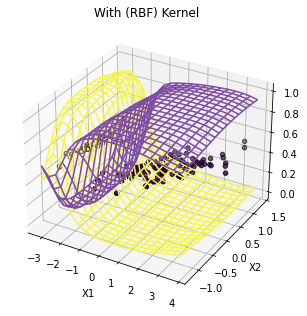

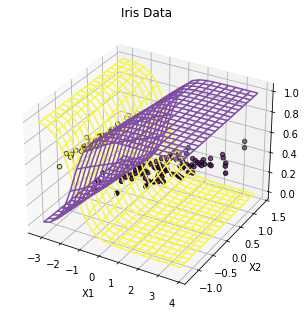

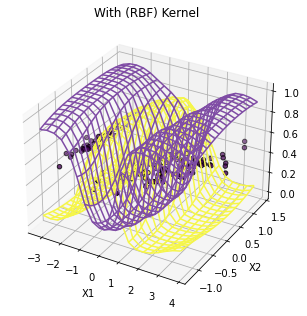

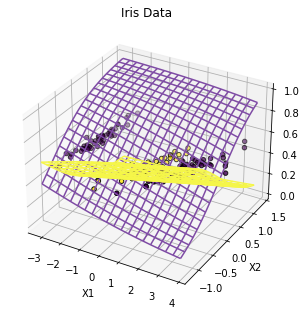

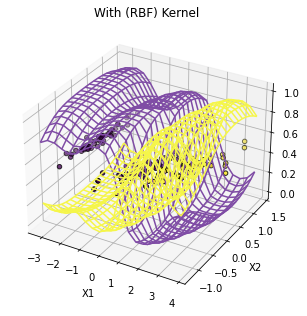

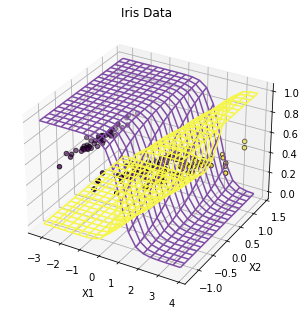

In [ ]:
bds=("iris_Setosa","iris_versicolor","iris_virginica")
l = LogisticRegression()
for i in bds:
    (X,y) = get_bd(i)
    xlabel="X1"
    ylabel="X2"
    X=pd.DataFrame(np.array(get_pca(X)), columns=[xlabel, ylabel])
    plot_belief_model_V1(l,X,y,xlabel, ylabel,n=20,kernel = "RBF") 
    plot_belief_model_V1(l,X,y,xlabel, ylabel,n=20)

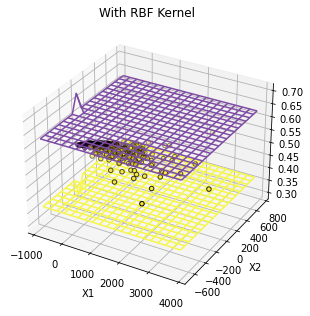

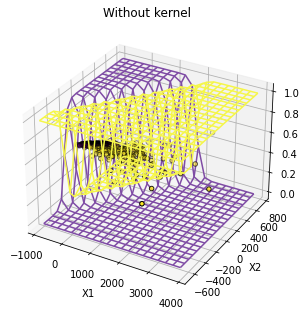

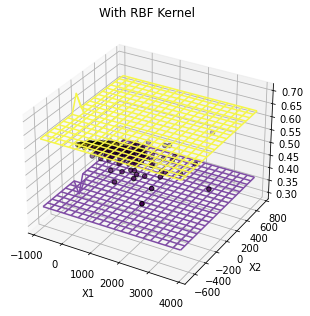

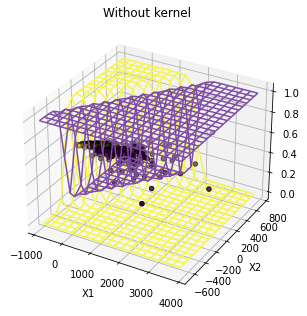

In [ ]:
bds=("breast_cancer_malignant","breast_cancer_benign")
l = LogisticRegression()
for i in bds:
    (X,y) = get_bd(i)
    xlabel="X1"
    ylabel="X2"
    X=pd.DataFrame(np.array(get_pca(X)), columns=[xlabel, ylabel])
    plot_belief_model_V1(l,X,y,xlabel, ylabel,n=20,kernel = "RBF") 
    plot_belief_model_V1(l,X,y,xlabel, ylabel,n=20) 

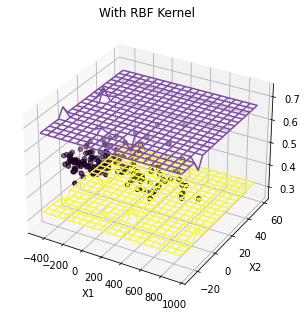

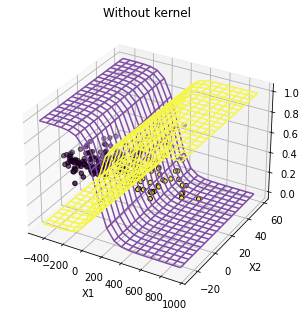

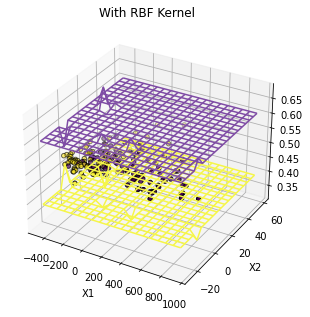

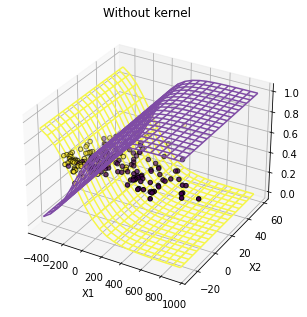

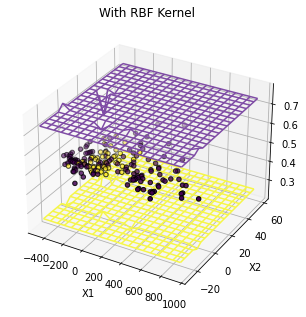

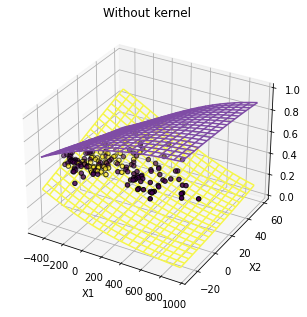

In [ ]:
bds=("wine_class_0","wine_class_1","wine_class_2")
l = LogisticRegression()
for i in bds:
    (X,y) = get_bd(i)
    xlabel="X1"
    ylabel="X2"
    X=pd.DataFrame(np.array(get_pca(X)), columns=[xlabel, ylabel])
    plot_belief_model_V1(l,X,y,xlabel, ylabel,n=20,kernel = "RBF") 
    plot_belief_model_V1(l,X,y,xlabel, ylabel,n=20) 

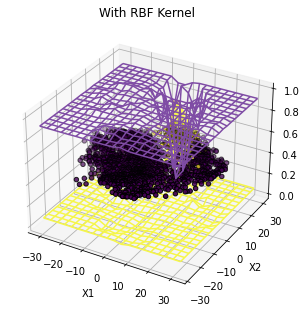

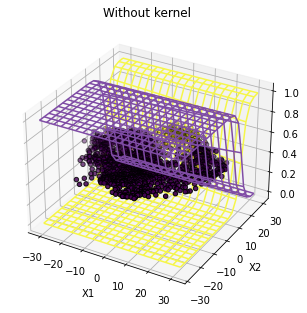

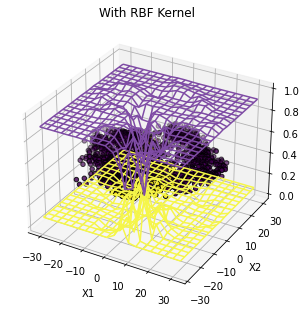

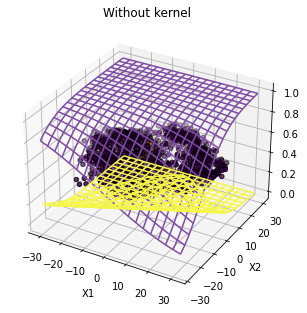

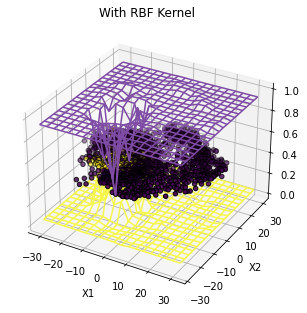

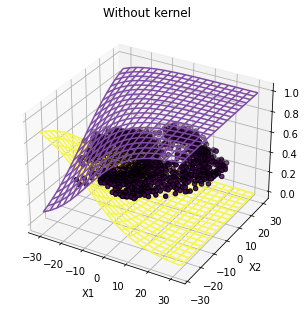

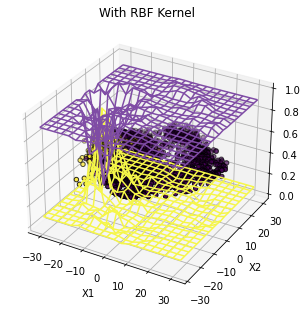

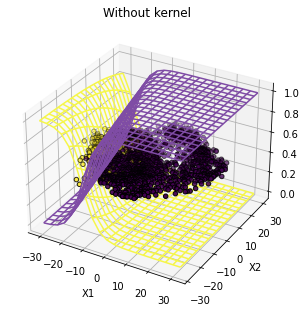

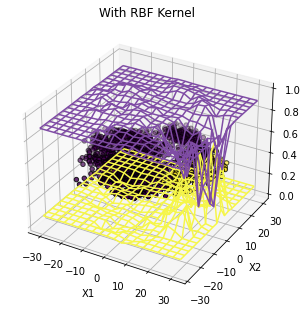

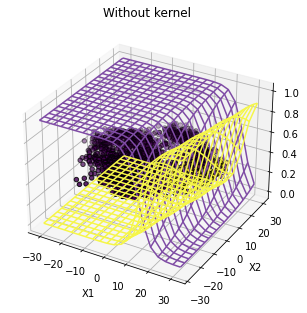

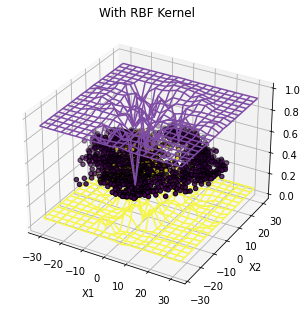

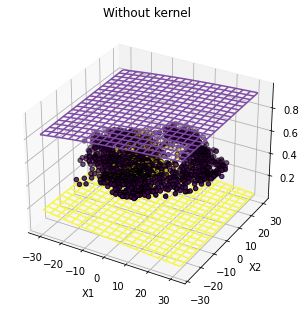

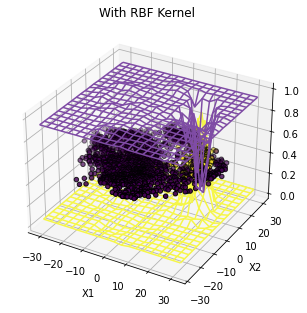

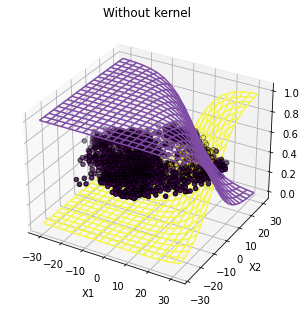

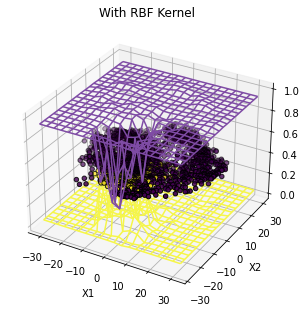

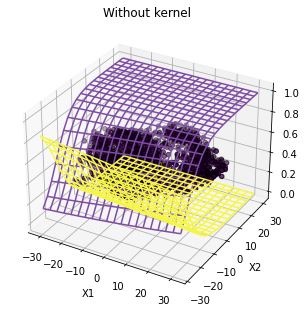

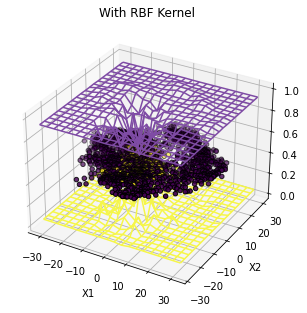

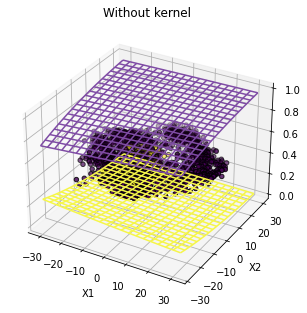

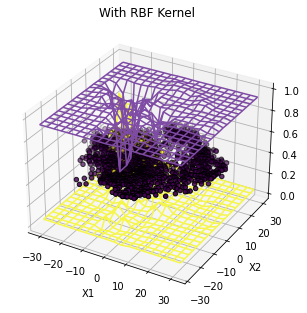

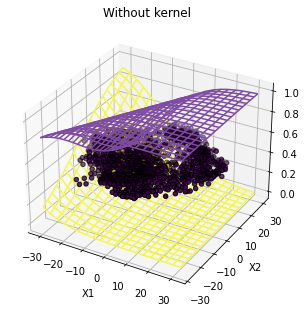

In [ ]:
bds=("digits_0","digits_1","digits_2","digits_3","digits_4","digits_5","digits_6","digits_7","digits_8","digits_9")
l = LogisticRegression()
for i in bds:
    (X,y) = get_bd(i)
    xlabel="X1"
    ylabel="X2"
    X=pd.DataFrame(np.array(get_pca(X)), columns=[xlabel, ylabel])
    plot_belief_model_V1(l,X,y,xlabel, ylabel,n=20,kernel = "RBF") 
    plot_belief_model_V1(l,X,y,xlabel, ylabel,n=20) 

### *Conclusions*

According to the results it can be seen that Kernel predicts a better classification of the data if the information is standardised.